<a href="https://colab.research.google.com/github/AshleyHeinrich/HealthcareClassification/blob/main/Project_2_MetSynd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metabolic Syndrome
Ashley Heinrich

## Import and Load Data

In [2]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

filename=('https://docs.google.com/spreadsheets/d/e/2PACX-1vRZCC3KLSaYXzE69EA2IYa6udd-0VbkqlhrT08i0OUD1JX8sU5uIG4IVG5wlvQ8SZnfyKz3FnTuGcux/pub?output=csv')
df = pd.read_csv(filename)
df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


## Exploring and Cleaning Data

In [3]:
df.info()
# Has 2401 rows and 15 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


In [4]:
df.nunique()
# Dropping seqn column/high cardinality

seqn                 2401
Age                    61
Sex                     2
Marital                 5
Income                 14
Race                    6
WaistCirc             635
BMI                   322
Albuminuria             3
UrAlbCr              1383
UricAcid               88
BloodGlucose          187
HDL                    93
Triglycerides         345
MetabolicSyndrome       2
dtype: int64

In [5]:
df['seqn'].value_counts()

62161    1
68696    1
68702    1
68703    1
68706    1
        ..
65410    1
65412    1
65416    1
65421    1
71915    1
Name: seqn, Length: 2401, dtype: int64

In [6]:
df = df.drop(['seqn'], axis=1)
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [7]:
df.isna().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [8]:
df.isna().sum() / len(df)*100
# % of missing data present
# Will impute post split

Age                  0.000000
Sex                  0.000000
Marital              8.663057
Income               4.872970
Race                 0.000000
WaistCirc            3.540192
BMI                  1.082882
Albuminuria          0.000000
UrAlbCr              0.000000
UricAcid             0.000000
BloodGlucose         0.000000
HDL                  0.000000
Triglycerides        0.000000
MetabolicSyndrome    0.000000
dtype: float64

In [9]:
# No duplicates
df.duplicated().sum()

0

In [10]:
df.describe(include = 'number')

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


**Assumptions**

In [11]:
"""
Normal Value Assumptions: 
(no column metrics provided)

1)BMI: >30 falls within obesity range
     < 18 is considered underweight

2) Albuminuria: <30 mg/g is normal
                > 30 could be indicative of kidney disease.
                ** These are ranked as  0,1,2 no information available for
                what this means; no true data dictionary. 
                Could potentially be referring to how chronic 
                kidney disease (CKD) ranks albuminuria: A1, A2, A3.
                See link below

3) Urine albumin to creatinine ratio(UrAlbCr)(UACR): <30mg/g is considered normal
                                            > 500-1000 range strongly correlates
                                            to kidney disease. 

4) Uric Acid: normal range 3.5-7.2mg/dl (increased levels are an indicator for MetSyn)

5) Blood Glucose: normal is 70-100mg/dl. *Assuming this is a fasting blood sugar

6) High Density Lipoprotein (HDL): >60mg/dl (higher #'s reduce
                                              risk of Heart Disease)

7) Triglycerides - normal is <150mg/dl

8) Waist Circumference - measured in cm.

Extra Information:

- All reputable definitions of metabolic syndrome use some blend 
of the following criteria; (no definition provided for data set)

1) Insulin resistance/hyperinsulinemia or hyperglycemia
2) Increased waist circumference or waist/hip ratio
3) Dyslipidemia (increased triglycerides)
4) Dyslipidemia- secondary (decreased HDL)
5) Hypertension (elevated blood pressure)**
6) Microalbuminuria (moderately increased albuminuria)

- High blood pressure is a leading cause of chronic kidney disease, 
whose diagnosis include elevated levels of some of the values in the data set; 
albuminuria, UACR and uric acid levels. 
- **High blood pressure can also be a complication of kidney disease as kidneys 
play an important role in keeping BP in a healthy range. 
- **There is no blood pressure in the data set, but we have lab values that have 
connections to kidney disease where blood pressure plays an integral role.
- Both metabolic syndrome and CKD can lead to heart disease. 
- Both share many risk factors which co-occur in individuals. 


https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.
https://www.kidney.org/atoz/content/albuminuria#:~:text=A%20normal%20amount%20of%20albumin,GFR%20number%20is%20above%2060.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8678728/#:~:text=Urine%20albumin%E2%80%90to%E2%80%90creatinine%20ratio%20(UACR)%20is%20most,ranging%20around%2025%20mg%2Fg.
https://www.kidney.org/professionals/explore-your-knowledge/how-to-classify-ckd
https://www.ucsfhealth.org/en/medical-tests/uric-acid----blood-#:~:text=Normal%20Results,of%20your%20specific%20test%20results.
https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test
https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/hdl-cholesterol/art-20046388
https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/triglycerides/art-20048186#:~:text=Borderline%20high%20%E2%80%94%20150%20to%20199,5.7%20mmol%2FL%20or%20above)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2675814/
"""

"\nNormal Value Assumptions: \n(no column metrics provided)\n\n1)BMI: >30 falls within obesity range\n     < 18 is considered underweight\n\n2) Albuminuria: <30 mg/g is normal\n                > 30 could be indicative of kidney disease.\n                ** These are ranked as  0,1,2 no information available for\n                what this means; no true data dictionary. \n                Could potentially be referring to how chronic \n                kidney disease (CKD) ranks albuminuria: A1, A2, A3.\n                See link below\n\n3) Urine albumin to creatinine ratio(UrAlbCr)(UACR): <30mg/g is considered normal\n                                            > 500-1000 range strongly correlates\n                                            to kidney disease. \n\n4) Uric Acid: normal range 3.5-7.2mg/dl (increased levels are an indicator for MetSyn)\n\n5) Blood Glucose: normal is 70-100mg/dl. *Assuming this is a fasting blood sugar\n\n6) High Density Lipoprotein (HDL): >60mg/dl (higher #

In [12]:
# Exploring higher values
high_value = df[df['UrAlbCr'] > 3000].index
high_value


Int64Index([50, 140, 910, 1557, 2070, 2196], dtype='int64')

In [13]:
"""
Levels of pts with kidney disease can be over 1000.  
Max of 5928 and extremely high values are being researched to make sure
it's not nonsensical. Leaving for now. Waiting on information from an 
MD. 

"""

"\nLevels of pts with kidney disease can be over 1000.  \nMax of 5928 and extremely high values are being researched to make sure\nit's not nonsensical. Leaving for now. Waiting on information from an \nMD. \n\n"

In [14]:
# Exploring higher values
high_tri = df[df['Triglycerides']>1000].index
high_tri
## Max is 1562 ... extremely high but not nonsensical

Int64Index([1016, 2092], dtype='int64')

In [15]:
df['Albuminuria'].value_counts()
# Ranked somehow as 0,1,2. Would be a question I would ask for more information about. 
# A possibility for how is given in link below
# https://www.kidney.org/professionals/explore-your-knowledge/how-to-classify-ckd

0    2089
1     254
2      58
Name: Albuminuria, dtype: int64

In [16]:
# Looking for Inconsistencies in object type columns
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Sex', 'Marital', 'Race', 'MetabolicSyndrome'], dtype='object')

In [17]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Sex
Female    1211
Male      1190
Name: Sex, dtype: int64



- Column= Marital
Married      1192
Single        498
Divorced      242
NaN           208
Widowed       166
Separated      95
Name: Marital, dtype: int64



- Column= Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64



- Column= MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64





 


1.   Target is imbalanced
2.   Other columns are appropriate with consistent values



##Univariate Visualizations

In [18]:
sns.set_palette('pastel')

**Target Countplot**

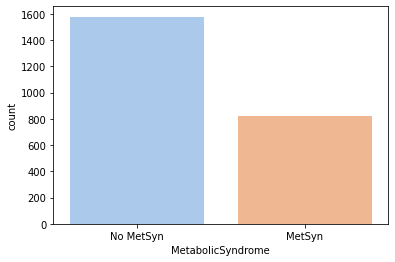

In [19]:
sns.countplot(data=df, x='MetabolicSyndrome');

* More patients without metabolic syndrome than with in dataset (Target). 

**Age Distribution and Boxplot**




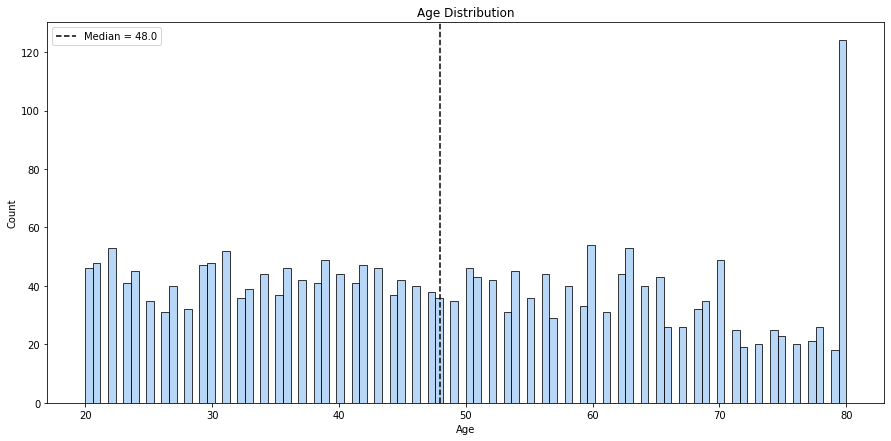

In [20]:
plt.figure(figsize = (15,7))
ax = sns.histplot(data = df, x = 'Age', bins=100);


ax.set(title = 'Age Distribution', xlabel = 'Age')

median = df['Age'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median = {median}')

ax.legend();

* Wide variety of ages represented from all age groups. 
* Many pts right around 80 yrs old. 
* Median age of 48yrs old. 

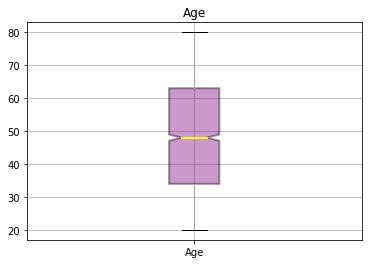

In [21]:
df.boxplot(column = ['Age'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'purple', alpha = .4));
           
plt.title('Age');

* No outliers present

**Sex Countplot**

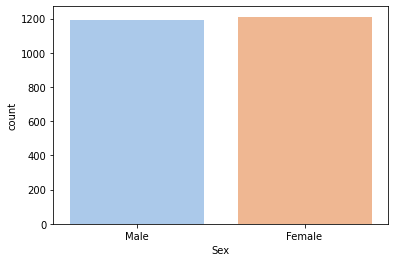

In [22]:
sns.countplot(data=df, x='Sex');

* Almost equal amounts of male/females represented in data


**Marital Status Countplot**

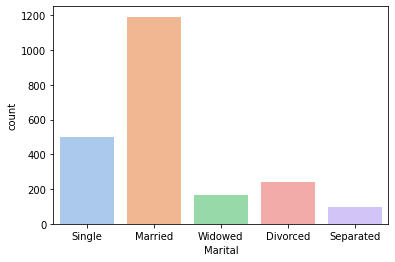

In [23]:
sns.countplot(data=df, x='Marital');

* Most patients in data set are married. 
* Next most common status is single 

**Income Boxplot**

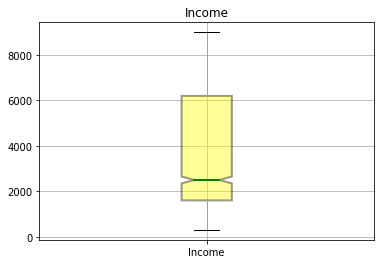

In [24]:
df.boxplot(column = ['Income'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='green'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'yellow', alpha = .4));
           
plt.title('Income');

* No outliers present

**Race Countplot**

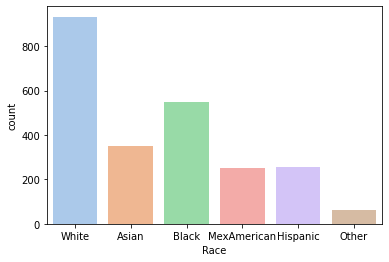

In [25]:
sns.countplot(data=df, x='Race');

* White has the highest amount of patients represented, followed by Black

**Waist Circumference**

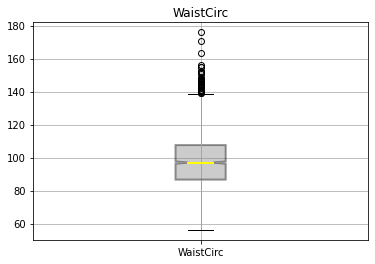

In [26]:
df.boxplot(column = ['WaistCirc'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'gray', alpha = .4));
           
plt.title('WaistCirc');

* Many outliers present above maximum. 

**BMI Distribution and Boxplot**

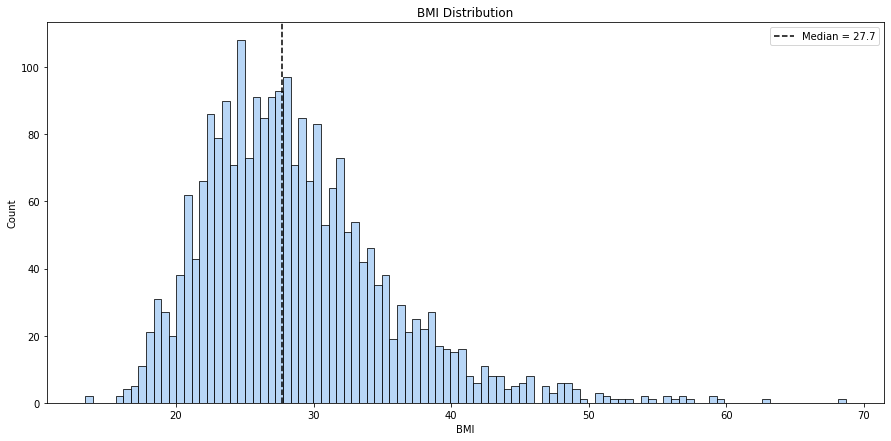

In [27]:
plt.figure(figsize = (15,7))
ax = sns.histplot(data = df, x = 'BMI', bins=100);


ax.set(title = 'BMI Distribution', xlabel = 'BMI')

median = df['BMI'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median = {median}')

ax.legend();

* Slightly right skewed with most data occuring around the median

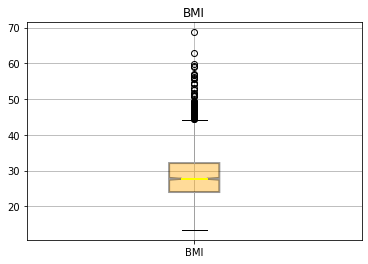

In [28]:
df.boxplot(column = ['BMI'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'orange', alpha = .4));
           
plt.title('BMI');

* Many outliers present above the maximum

**Albuminuria Countplot**

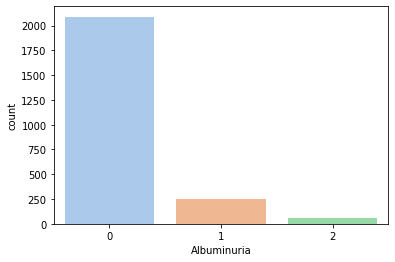

In [29]:
sns.countplot(data=df, x='Albuminuria');

* Most values fall in the '0' category. 
* No data dictionary so there unfortunately isn't a reference point to give meaning to this order. 

**Urine Albumin to Creatinine Ratio**

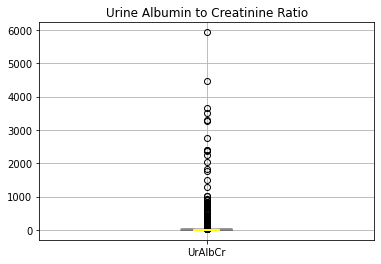

In [30]:
df.boxplot(column = ['UrAlbCr'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'purple', alpha = .4));
        
plt.title('Urine Albumin to Creatinine Ratio');

* Box is being compressed as a result of extreme outliers being accomodated by the scaling. 
* Many outliers above the maximum

In [31]:
df['UrAlbCr'].describe()

count    2401.000000
mean       43.626131
std       258.272829
min         1.400000
25%         4.450000
50%         7.070000
75%        13.690000
max      5928.000000
Name: UrAlbCr, dtype: float64

**Uric Acid**

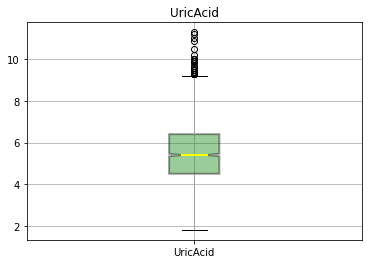

In [32]:
df.boxplot(column = ['UricAcid'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'green', alpha = .4));
        
plt.title('UricAcid');

* Outliers present above the maximum 

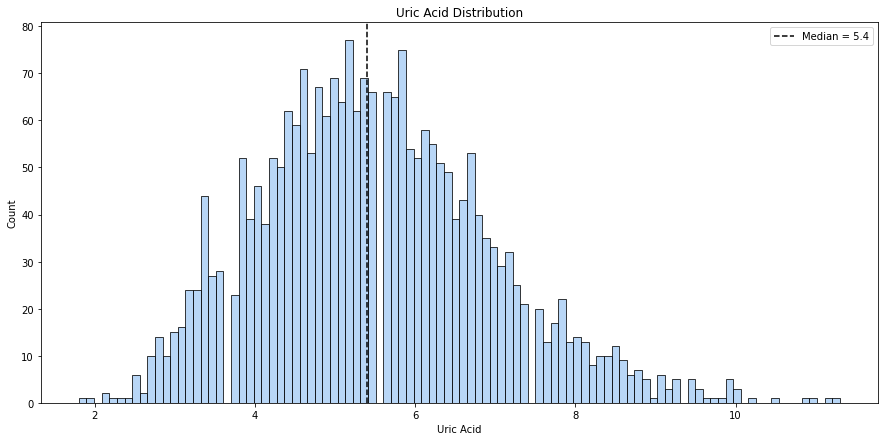

In [33]:
plt.figure(figsize = (15,7))
ax = sns.histplot(data = df, x = 'UricAcid', bins=100);


ax.set(title = 'Uric Acid Distribution', xlabel = 'Uric Acid')

median = df['UricAcid'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median = {median}')

ax.legend();

* Fairly well distributed with some values having no representation in dataset. 
* Most of the data occurs around the median

**Blood Glucose**

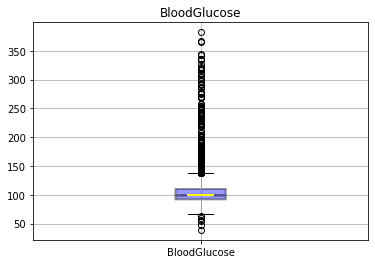

In [34]:
df.boxplot(column = ['BloodGlucose'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4));
        
plt.title('BloodGlucose');

* Box being compressed to accomodate many outliers both above the maximum and below the minimum. 

In [35]:
df['BloodGlucose'].describe()

count    2401.000000
mean      108.247813
std        34.820657
min        39.000000
25%        92.000000
50%        99.000000
75%       110.000000
max       382.000000
Name: BloodGlucose, dtype: float64

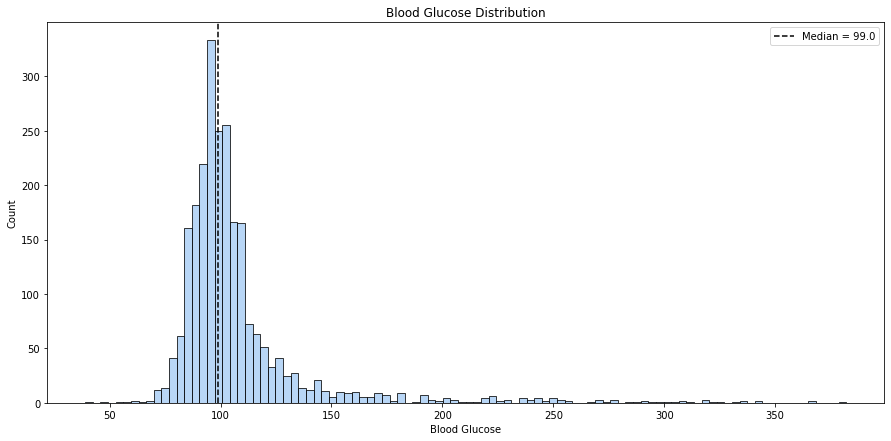

In [40]:
plt.figure(figsize = (15,7))
ax = sns.histplot(data = df, x = 'BloodGlucose', bins=100);


ax.set(title = 'Blood Glucose Distribution', xlabel = 'Blood Glucose')

median = df['BloodGlucose'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median = {median}')

ax.legend();

* Right skewed with most values occuring around the median (99)

**HDL Cholesterol**

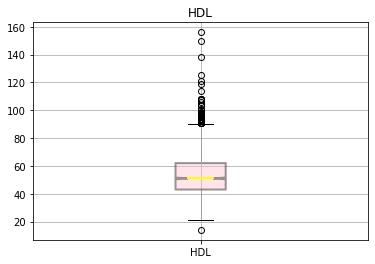

In [37]:
df.boxplot(column = ['HDL'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'pink', alpha = .4));
        
plt.title('HDL');

* Many outliers above the maximum. 
* Outlier noted below the minimum 

**Triglycerides**

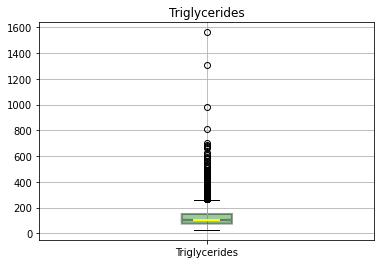

In [38]:
df.boxplot(column = ['Triglycerides'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'green', alpha = .4));
        
plt.title('Triglycerides');

* Box is being compressed as a result of extreme outliers being accomodated by the scaling. 
* Many outliers above the maximum

In [39]:
df['Triglycerides'].describe()

count    2401.000000
mean      128.125364
std        95.322477
min        26.000000
25%        75.000000
50%       103.000000
75%       150.000000
max      1562.000000
Name: Triglycerides, dtype: float64